# Stock Price Prediction

# Importing Necessary Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional,Input,Dropout

# Reading the Dataset

In [35]:
# Load the dataset.
data=pd.read_csv('google_dataset.csv')

In [36]:
# Get the first five rows of the dataset.
data.head()

close     high       low    open   volume  \
GOOG 2016-01-11 00:00:00+00:00  716.03  718.855  703.5400  716.61  2090621   
     2016-01-12 00:00:00+00:00  726.07  728.750  717.3165  721.68  2024509   
     2016-01-13 00:00:00+00:00  700.56  734.740  698.6100  730.85  2501730   
     2016-01-14 00:00:00+00:00  714.72  721.925  689.1000  705.38  2225768   
     2016-01-15 00:00:00+00:00  694.45  706.740  685.3700  692.29  3608109   

                                adjClose  adjHigh    adjLow  adjOpen  \
GOOG 2016-01-11 00:00:00+00:00    716.03  718.855  703.5400   716.61   
     2016-01-12 00:00:00+00:00    726.07  728.750  717.3165   721.68   
     2016-01-13 00:00:00+00:00    700.56  734.740  698.6100   730.85   
     2016-01-14 00:00:00+00:00    714.72  721.925  689.1000   705.38   
     2016-01-15 00:00:00+00:00    694.45  706.740  685.3700   692.29   

                                adjVolume  divCash  splitFactor  
GOOG 2016-01-11 00:00:00+00:00    2090621      0.0          1.0  
     2016-01-12 00:00:00+00:00    2024509      0.0          1.0  
     2016-01-13 00:00:00+00:00    2501730      0.0          1.0  
     2016-01-14 00:00:00+00:00    2225768      0.0          1.0  
     2016-01-15 00:00:00+00:00    3608109      0.0          1.0

In [37]:
# Get the last five rows of the dataset.
data.tail()

close      high       low     open   volume  \
GOOG 2020-12-30 00:00:00+00:00  1739.52  1765.095  1725.600  1762.01  1306130   
     2020-12-31 00:00:00+00:00  1751.88  1758.930  1735.420  1735.42  1012240   
     2021-01-04 00:00:00+00:00  1728.24  1760.650  1707.850  1757.54  1901855   
     2021-01-05 00:00:00+00:00  1740.92  1747.670  1718.015  1725.00  1145347   
     2021-01-06 00:00:00+00:00  1735.29  1748.000  1699.000  1702.63  2602114   

                                adjClose   adjHigh    adjLow  adjOpen  \
GOOG 2020-12-30 00:00:00+00:00   1739.52  1765.095  1725.600  1762.01   
     2020-12-31 00:00:00+00:00   1751.88  1758.930  1735.420  1735.42   
     2021-01-04 00:00:00+00:00   1728.24  1760.650  1707.850  1757.54   
     2021-01-05 00:00:00+00:00   1740.92  1747.670  1718.015  1725.00   
     2021-01-06 00:00:00+00:00   1735.29  1748.000  1699.000  1702.63   

                                adjVolume  divCash  splitFactor  
GOOG 2020-12-30 00:00:00+00:00    1306130      0.0          1.0  
     2020-12-31 00:00:00+00:00    1012240      0.0          1.0  
     2021-01-04 00:00:00+00:00    1901855      0.0          1.0  
     2021-01-05 00:00:00+00:00    1145347      0.0          1.0  
     2021-01-06 00:00:00+00:00    2602114      0.0          1.0

# Descriptive Statistics

In [38]:
# Get dataframe dimensions
print("Database dimension     :",data.shape)
print("Database size          :",data.size)

# Get info about the dataframe (columns,entries,datatype etc...)
data.info()     

# Describe the dataframe and get statistics
data.describe()

Database dimension     : (1257, 12)
Database size          : 15084
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1257 entries, ('GOOG', '2016-01-11 00:00:00+00:00') to ('GOOG', '2021-01-06 00:00:00+00:00')
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1257 non-null   float64
 1   high         1257 non-null   float64
 2   low          1257 non-null   float64
 3   open         1257 non-null   float64
 4   volume       1257 non-null   int64  
 5   adjClose     1257 non-null   float64
 6   adjHigh      1257 non-null   float64
 7   adjLow       1257 non-null   float64
 8   adjOpen      1257 non-null   float64
 9   adjVolume    1257 non-null   int64  
 10  divCash      1257 non-null   float64
 11  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 163.8+ KB


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.0
mean,1093.039387,1103.023356,1082.226892,1092.351952,1.659480e+06,1093.039387,1103.023358,1082.226898,1092.351952,1.659480e+06,0.0,1.0
std,270.201135,273.823642,266.419694,269.676372,7.615813e+05,270.201135,273.823645,266.419704,269.676372,7.615813e+05,0.0,0.0
min,668.260000,672.300000,663.060000,667.850000,3.467530e+05,668.260000,672.300000,663.060000,667.850000,3.467530e+05,0.0,1.0
25%,841.650000,844.910000,839.320000,842.880000,1.199326e+06,841.650000,844.910000,839.320000,842.880000,1.199326e+06,0.0,1.0
50%,1086.230000,1097.100000,1073.470000,1086.030000,1.461151e+06,1086.230000,1097.100000,1073.470000,1086.030000,1.461151e+06,0.0,1.0
75%,1232.410000,1243.090000,1223.080000,1231.350000,1.865139e+06,1232.410000,1243.090000,1223.080000,1231.350000,1.865139e+06,0.0,1.0
max,1827.990000,1847.200000,1822.650000,1824.520000,6.348126e+06,1827.990000,1847.200000,1822.650000,1824.520000,6.348126e+06,0.0,1.0


# Missing Values

In [39]:
# Missing data
data.isnull().sum()


close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [40]:
# As a part of the Data cleansing we check the data for any missing/ na values
# Null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# Null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    12
dtype: int64 

Null Percentage for Columns:

 0.0    12
dtype: int64


In [41]:
# Null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# Null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    1257
dtype: int64 

Null Percentage for Rows:

 0.0    1257
dtype: int64


# Extracting the Closing Price

In [7]:
close_price=data['close']

In [8]:
close_price

GOOG  2016-01-11 00:00:00+00:00     716.03
      2016-01-12 00:00:00+00:00     726.07
      2016-01-13 00:00:00+00:00     700.56
      2016-01-14 00:00:00+00:00     714.72
      2016-01-15 00:00:00+00:00     694.45
                                    ...   
      2020-12-30 00:00:00+00:00    1739.52
      2020-12-31 00:00:00+00:00    1751.88
      2021-01-04 00:00:00+00:00    1728.24
      2021-01-05 00:00:00+00:00    1740.92
      2021-01-06 00:00:00+00:00    1735.29
Name: close, Length: 1257, dtype: float64

In [9]:
close_price=np.array(close_price)

In [10]:
close_price

array([ 716.03,  726.07,  700.56, ..., 1728.24, 1740.92, 1735.29])

In [11]:
close_price.shape

(1257,)

# Plotting the closing price

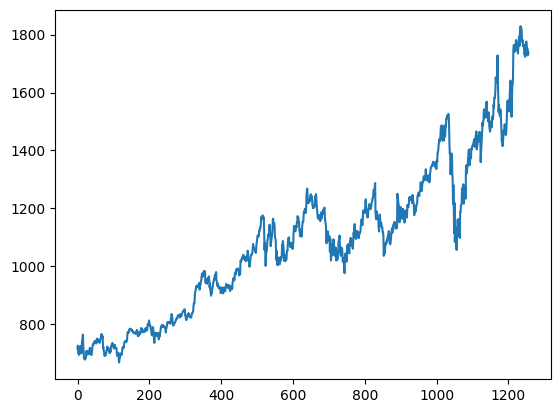

In [12]:
# Plotting the closing stock price.
plt.plot(close_price)

# Applying MinMax Scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

Preprocessing of data for LSTM model

In [15]:
minmax=MinMaxScaler()

In [16]:
close_price=minmax.fit_transform(close_price.reshape(-1,1))

In [17]:
minmax.data_min_

array([668.26])

In [18]:
minmax.data_max_

array([1827.99])

# Converting the data into time stamps of 100 days

In [19]:
sample=[]
data_stamps=[]
price=[]


for i in range(1157):
  sample=[]
  for j in range(i,100+i):
    sample.append(close_price[j])
  price.append(close_price[100+i])
  data_stamps.append(sample)

In [20]:
data_stamps=np.array(data_stamps)

In [21]:
data_stamps.shape

(1157, 100, 1)

In [22]:
price=np.array(price)

In [23]:
price.shape

(1157, 1)

# Splitting the datastamps into training and testing samples

In [24]:
# Determining X_test and y_test using datastamps set.
x_train=data_stamps[:int(0.7*len(list(data_stamps)))]
y_train=price[:int(0.7*len(list(data_stamps)))]

x_test=data_stamps[int(0.7*len(list(data_stamps))):]
y_test=price[int(0.7*len(list(data_stamps))):]


# Defining a nueral network

In [25]:
# Defining the LSTM model.
model=Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True),input_shape=(100,1)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100, 200)         81600     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 335,329
Trainable params: 335,329
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='Adam',loss='mse')

# Training a model

In [28]:
# Training the LSTM model for the given dataset.
model.fit(x=x_train,y=y_train,epochs=50)

Epoch 1/50
26/26 [==============================] - 40s 511ms/step - loss: 0.0095
Epoch 2/50
26/26 [==============================] - 12s 467ms/step - loss: 8.6694e-04
Epoch 3/50
26/26 [==============================] - 12s 465ms/step - loss: 6.3394e-04
Epoch 4/50
26/26 [==============================] - 13s 502ms/step - loss: 5.7604e-04
Epoch 5/50
26/26 [==============================] - 13s 487ms/step - loss: 5.3494e-04
Epoch 6/50
26/26 [==============================] - 12s 471ms/step - loss: 4.9273e-04
Epoch 7/50
26/26 [==============================] - 12s 479ms/step - loss: 4.9148e-04
Epoch 8/50
26/26 [==============================] - 13s 506ms/step - loss: 5.2153e-04
Epoch 9/50
26/26 [==============================] - 12s 478ms/step - loss: 4.7916e-04
Epoch 10/50
26/26 [==============================] - 13s 505ms/step - loss: 4.6085e-04
Epoch 11/50
26/26 [==============================] - 14s 555ms/step - loss: 4.4891e-04
Epoch 12/50
26/26 [==============================] - 13s

In [29]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 77s 171ms/step - loss: 0.0011


0.001072603976354003

# Predicting the test data

In [30]:
# Predicting the dataset.
y_pred=model.predict(x_test)

11/11 [==============================] - 15s 173ms/step


In [31]:
y_pred

array([[0.4516818 ],
       [0.45468467],
       [0.455443  ],
       [0.43945813],
       [0.43697643],
       [0.4362237 ],
       [0.43816707],
       [0.44934797],
       [0.45455933],
       [0.4488907 ],
       [0.4502175 ],
       [0.4637278 ],
       [0.46919483],
       [0.47127497],
       [0.4721427 ],
       [0.4778319 ],
       [0.48669294],
       [0.49359107],
       [0.4930847 ],
       [0.49074137],
       [0.49027193],
       [0.49300635],
       [0.4911196 ],
       [0.49178964],
       [0.48591548],
       [0.49447936],
       [0.49814922],
       [0.4932658 ],
       [0.48742503],
       [0.47823173],
       [0.46133208],
       [0.45680004],
       [0.4645589 ],
       [0.4699474 ],
       [0.4653784 ],
       [0.46753865],
       [0.4711672 ],
       [0.475694  ],
       [0.4782953 ],
       [0.48990375],
       [0.49621773],
       [0.5025876 ],
       [0.50176585],
       [0.50042707],
       [0.49783882],
       [0.5032546 ],
       [0.50765526],
       [0.511

# Plotting closing prices of testing vs predicted data

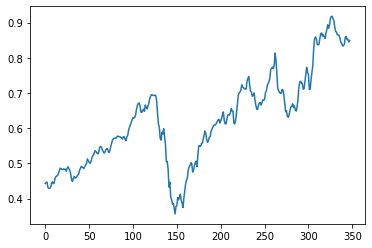

In [32]:
# Plotting the y_prediction data.
plt.plot(y_pred)

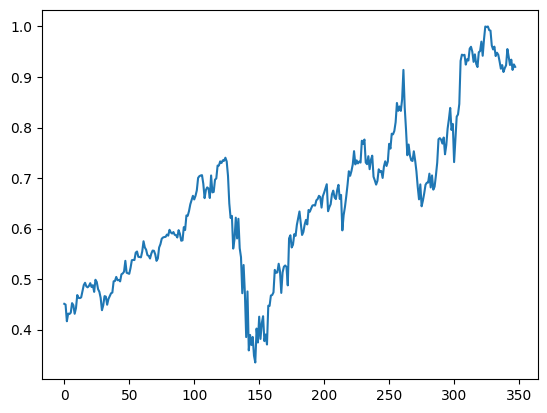

In [32]:
# Plotting the y_test prediction data.
plt.plot(y_test)

# Author(s)


Vincent Mukomba